Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


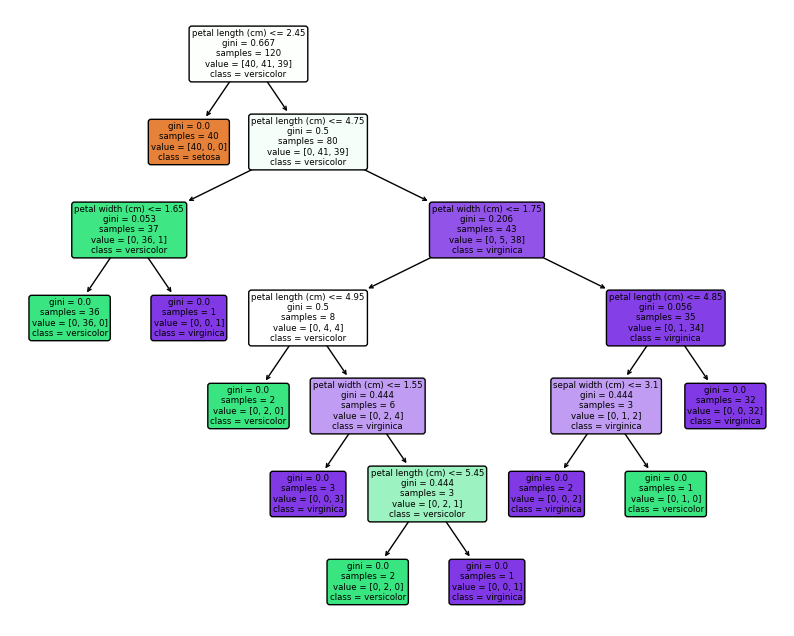

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


# Load dataset (e.g., Iris)
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target


# Split dataset into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


# Make predictions on test data
y_pred = clf.predict(X_test)


# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


# Visualize Decision Tree
plt.figure(figsize=(10,8))
plot_tree(clf, filled=True, rounded=True, class_names=iris.target_names, feature_names=iris.feature_names)
plt.show()

This program:


1. Loads the Iris dataset.
2. Splits the data into training and testing sets.
3. Trains a Decision Tree classifier.
4. Makes predictions on the test data.
5. Evaluates model performance using accuracy, classification report, and confusion matrix.
6. Visualizes the Decision Tree.


**Tuning Decision Tree Hyperparameters:**

*   `max_depth`: Maximum tree depth.
*   `min_samples_split`: Minimum samples required to split an internal node.
*   `min_samples_leaf`: Minimum samples required to be at a leaf node.
*   `criterion`: Splitting criterion (e.g., gini, entropy).

In [3]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Score: 0.95
